## Tools neeeded

In [1]:
!pip install graphical_model_learning
!pip install cdt
!pip install ges
!pip install sempler

from graphical_model_learning import pcalg, gsp
from graphical_models.rand import directed_erdos, rand_weights
from conditional_independence import MemoizedCI_Tester
from conditional_independence import partial_correlation_suffstat, partial_correlation_test
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.cit import chisq, fisherz

import numpy as np
import matplotlib.pyplot as plt
import ges
import sempler

/home/hadi/Downloads/code/causal-ml-course/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_mec(adj_matrix):
  x = list()

  # find all morality
  for j in range(len(adj_matrix)):
    if sum(adj_matrix[:, j]) >= 2:
      for i in range(len(adj_matrix)):
        if adj_matrix[i, j] == 1 :
          x.append([i, j])
  
  for i in range(len(adj_matrix)):
    for j in range(len(adj_matrix)):
      if (adj_matrix[i, j] == 1) and (not([i, j] in x)):
        adj_matrix[j, i] = 1

  return adj_matrix

def get_skeleton(adj_matrix):
  for i in range(len(adj_matrix)):
    for j in range(len(adj_matrix)):
      if adj_matrix[i,j] == 1:
        adj_matrix[j, i] =1
  
  return adj_matrix

def shd_skeleton_simple(mat1, mat2):
  diff = np.abs(mat1 - mat2)
  return np.sum(diff)/2

def shd_mec_simple(mat1, mat2):
  diff = np.abs(mat1 - mat2)
  return np.sum(diff)

In [3]:

PC_results_aggregated_MEC, GSP_results_aggregated_MEC, GES_results_aggregated_MEC, FCI_results_aggregated_MEC = [], [], [], []
PC_results_aggregated_skeleton, GSP_results_aggregated_skeleton, GES_results_aggregated_skeleton, FCI_results_aggregated_skeleton = [], [], [], []

alpha = 0.01
for i in range(3):
  nnodes = 15
  d = directed_erdos(nnodes, 0.2)
  d_mec = get_mec(d.to_amat()[0])
  g = rand_weights(d)
  sample_nums = list(range(30,10000, 100))
  PC_results_MEC, GSP_results_MEC, GES_results_MEC, FCI_results_MEC = [], [], [], []
  PC_results_skeleton, GSP_results_skeleton, GES_results_skeleton, FCI_results_skeleton = [], [], [], []
  for sample_num in sample_nums:
      samples = g.sample(sample_num)
      suffstat = partial_correlation_suffstat(samples)
      ci_tester = MemoizedCI_Tester(partial_correlation_test, suffstat, alpha=alpha)
      # PC
      estimated_graph_pc = pcalg(set(range(nnodes)), ci_tester)

      # GSP
      estimated_graph_gsp = gsp(set(range(nnodes)), ci_tester)

      # GES
      estimate, score = ges.fit_bic(samples)

      # FCI
      G, edges = fci(samples,fisherz,alpha, verbose=False)

      PC_results_MEC.append(d.shd_skeleton(estimated_graph_pc))
      GSP_results_MEC.append(d.shd_skeleton(estimated_graph_gsp))
      GES_results_MEC.append(shd_skeleton_simple(get_skeleton(d.to_amat()[0]), get_skeleton(estimate)))
      FCI_results_MEC.append(shd_skeleton_simple(get_skeleton(d.to_amat()[0]), get_skeleton(G.graph)))

      PC_results_skeleton.append(shd_mec_simple(d_mec, get_mec(estimated_graph_pc.to_amat()[0])))
      GSP_results_skeleton.append(shd_mec_simple(d_mec, get_mec(estimated_graph_gsp.to_amat()[0])))
      GES_results_skeleton.append(shd_mec_simple(d_mec, get_mec(estimate)))
      FCI_results_skeleton.append(shd_mec_simple(d_mec, get_mec(G.graph)))

  
  PC_results_aggregated_MEC.append(PC_results_MEC)
  GSP_results_aggregated_MEC.append(GSP_results_MEC)
  GES_results_aggregated_MEC.append(GES_results_MEC)
  FCI_results_aggregated_MEC.append(FCI_results_MEC)

  PC_results_aggregated_skeleton.append(PC_results_skeleton)
  GSP_results_aggregated_skeleton.append(GSP_results_skeleton)
  GES_results_aggregated_skeleton.append(GES_results_skeleton)
  FCI_results_aggregated_skeleton.append(FCI_results_skeleton)

Starting Fast Adjacency Search.


Depth=5, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1061.29it/s]


Finishing Fast Adjacency Search.
X1 --> X11
X1 --> X14
X3 --> X2
X10 --> X2
X3 --> X6
X14 --> X3
X10 --> X4
X11 --> X4
X8 --> X9
X14 --> X8
X9 --> X15
Starting Fast Adjacency Search.


Depth=5, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 852.29it/s]


Finishing Fast Adjacency Search.
X3 --> X2
X10 --> X2
X10 --> X4
X10 --> X6
X8 --> X9
X9 --> X15
Starting Fast Adjacency Search.


Depth=5, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 781.83it/s]


Finishing Fast Adjacency Search.
X1 --> X11
X1 --> X14
X3 --> X2
X10 --> X2
X14 --> X3
X10 --> X4
X11 --> X4
X10 --> X6
X8 --> X9
X14 --> X8
X9 --> X15
Starting Fast Adjacency Search.


Depth=5, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 757.07it/s]


Finishing Fast Adjacency Search.
X1 --> X7
X1 --> X11
X3 --> X2
X10 --> X2
X3 --> X6
X10 --> X4
X11 --> X4
X10 --> X6
X8 --> X9
X9 --> X15
Starting Fast Adjacency Search.


Depth=5, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 849.71it/s]


Finishing Fast Adjacency Search.
X1 --> X11
X1 --> X14
X3 --> X2
X10 --> X2
X14 --> X3
X10 --> X4
X11 --> X4
X10 --> X6
X8 --> X9
X14 --> X8
X9 --> X15
Starting Fast Adjacency Search.


Depth=5, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 894.14it/s] 


Finishing Fast Adjacency Search.
X3 --> X2
X10 --> X2
X10 --> X4
X10 --> X6
X8 --> X9
X9 --> X15
Starting Fast Adjacency Search.


Depth=5, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 845.28it/s]


Finishing Fast Adjacency Search.
X3 --> X2
X10 --> X2
X3 --> X6
X10 --> X4
X8 --> X9
X9 --> X15
Starting Fast Adjacency Search.


Depth=5, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 679.19it/s] 


Finishing Fast Adjacency Search.
X1 --> X11
X1 --> X14
X3 --> X2
X10 --> X2
X14 --> X3
X10 --> X4
X11 --> X4
X10 --> X6
X8 --> X9
X14 --> X8
X9 --> X15
Starting Fast Adjacency Search.


Depth=5, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1026.57it/s]


Finishing Fast Adjacency Search.
X3 --> X2
X10 --> X2
X3 --> X6
X10 --> X4
X8 --> X9
X9 --> X15
Starting Fast Adjacency Search.


Depth=5, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 777.91it/s]


Finishing Fast Adjacency Search.
X1 --> X11
X1 --> X14
X3 --> X2
X10 --> X2
X3 --> X6
X14 --> X3
X10 --> X4
X11 --> X4
X8 --> X9
X14 --> X8
X9 --> X15
Starting Fast Adjacency Search.


Depth=5, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1162.07it/s]


Finishing Fast Adjacency Search.
X10 --> X2
X3 --> X6
X14 --> X3
X8 --> X9
X9 --> X15
Starting Fast Adjacency Search.


Depth=5, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 854.17it/s]


Finishing Fast Adjacency Search.
X1 --> X11
X1 --> X14
X3 --> X2
X10 --> X2
X14 --> X3
X10 --> X4
X11 --> X4
X10 --> X6
X8 --> X9
X14 --> X8
X9 --> X15
Starting Fast Adjacency Search.


Depth=5, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 885.85it/s]


Finishing Fast Adjacency Search.
X1 --> X6
X1 --> X7
X11 --> X1
X3 --> X2
X10 --> X2
X14 --> X3
X10 --> X4
X10 --> X6
X8 --> X9
X14 --> X8
X9 --> X15
Starting Fast Adjacency Search.


Depth=5, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 797.19it/s]


Finishing Fast Adjacency Search.
X3 --> X2
X10 --> X2
X3 --> X6
X10 --> X4
X8 --> X9
X9 --> X15
Starting Fast Adjacency Search.


Depth=5, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 838.02it/s] 


Finishing Fast Adjacency Search.
X1 --> X11
X1 --> X14
X3 --> X2
X10 --> X2
X3 --> X6
X14 --> X3
X10 --> X4
X11 --> X4
X8 --> X9
X14 --> X8
X9 --> X15
Starting Fast Adjacency Search.


Depth=5, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 909.56it/s] 


Finishing Fast Adjacency Search.
X3 --> X2
X10 --> X2
X3 --> X6
X10 --> X4
X8 --> X9
X9 --> X15
Starting Fast Adjacency Search.


Depth=5, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1463.23it/s]


Finishing Fast Adjacency Search.
X3 --> X2
X10 --> X2
X3 --> X6
X10 --> X4
X8 --> X9
X9 --> X15
Starting Fast Adjacency Search.


Depth=5, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1470.58it/s]


Finishing Fast Adjacency Search.
X3 --> X2
X10 --> X2
X3 --> X6
X10 --> X4
X8 --> X9
X9 --> X15
Starting Fast Adjacency Search.


Depth=5, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1175.12it/s]


Finishing Fast Adjacency Search.
X3 --> X2
X10 --> X2
X10 --> X4
X10 --> X6
X8 --> X9
X9 --> X15
Starting Fast Adjacency Search.


Depth=1, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 471.04it/s]

Finishing Fast Adjacency Search.


Starting Fast Adjacency Search.


Depth=3, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 798.67it/s]

Finishing Fast Adjacency Search.


Starting Fast Adjacency Search.


Depth=3, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 665.45it/s]

Finishing Fast Adjacency Search.


X1 --> X4
X8 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 803.49it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 815.47it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 690.15it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X8 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 837.60it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1176.39it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 671.86it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1158.14it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 659.63it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 931.94it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1099.90it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1132.66it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 826.99it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 837.42it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 829.06it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 653.20it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X8 --> X10
X8 --> X11
X11 --> X13
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1180.43it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 793.80it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 838.73it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 925.57it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X8 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 592.11it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 954.42it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 790.92it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 847.41it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 881.55it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 852.11it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1019.75it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1339.23it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 802.20it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 882.61it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 766.76it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 775.69it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 820.66it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 967.75it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 817.11it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 776.63it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1007.73it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 825.12it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1124.76it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 670.25it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X8 --> X1
X6 --> X4
X6 --> X8
X8 --> X10
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 701.99it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 770.04it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 819.84it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1282.82it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 730.04it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 739.47it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 724.61it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 926.25it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X10 --> X9
X15 --> X9
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1531.44it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X1 --> X8
X6 --> X4
X8 --> X10
X8 --> X11
X11 --> X13
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 816.68it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 743.42it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1320.18it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X10 --> X9
X15 --> X9
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 873.24it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1143.82it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X3 --> X2
X3 --> X7
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 855.64it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 741.08it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X10 --> X9
X15 --> X9
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 915.52it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X10 --> X9
X15 --> X9
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 812.30it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X10 --> X9
X15 --> X9
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 977.69it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 810.40it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1165.06it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 825.67it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X10 --> X9
X15 --> X9
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 763.04it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 598.72it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X10 --> X9
X15 --> X9
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1192.76it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1076.92it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X10 --> X9
X15 --> X9
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 833.36it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1013.39it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1069.52it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 994.71it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X10 --> X9
X15 --> X9
X15 --> X12
Starting Fast Adjacency Search.


Depth=5, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 882.86it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X3 --> X2
X3 --> X7
X6 --> X4
X10 --> X9
X15 --> X9
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 882.69it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X8 --> X10
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 797.18it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 814.39it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 819.41it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X10 --> X9
X15 --> X9
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 661.55it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X10 --> X9
X15 --> X9
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 812.76it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 812.44it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X10 --> X9
X15 --> X9
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1132.86it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 823.69it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1221.69it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X10 --> X9
X15 --> X9
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1077.41it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X6 --> X13
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 852.97it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 702.92it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X9 --> X8
X8 --> X10
X8 --> X11
X15 --> X9
X11 --> X13
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 682.87it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X8 --> X1
X6 --> X4
X6 --> X8
X8 --> X10
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 724.56it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X8 --> X1
X6 --> X4
X6 --> X8
X8 --> X10
X10 --> X9
X15 --> X9
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1289.05it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X10 --> X9
X15 --> X9
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 643.23it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 672.00it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X10 --> X9
X15 --> X9
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 864.58it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 1124.50it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 785.82it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 675.32it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X8 --> X11
X10 --> X9
X15 --> X9
X11 --> X13
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 754.02it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X8 --> X1
X6 --> X4
X8 --> X10
X10 --> X9
X15 --> X9
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 801.13it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X10 --> X9
X15 --> X9
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 741.63it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X8 --> X11
X11 --> X13
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 793.18it/s] 


Finishing Fast Adjacency Search.
X4 --> X1
X6 --> X4
X10 --> X9
X15 --> X9
X15 --> X12
Starting Fast Adjacency Search.


Depth=4, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 825.61it/s]


Finishing Fast Adjacency Search.
X4 --> X1
X8 --> X1
X6 --> X4
X6 --> X8
X8 --> X10
X10 --> X9
X15 --> X9
X15 --> X12


In [4]:
# save results as pickles
import pickle

with open('PC_results_aggregated_MEC.pkl', 'wb') as f:
    pickle.dump(PC_results_aggregated_MEC, f)

with open('GSP_results_aggregated_MEC.pkl', 'wb') as f:
    pickle.dump(GSP_results_aggregated_MEC, f)

with open('GES_results_aggregated_MEC.pkl', 'wb') as f:
    pickle.dump(GES_results_aggregated_MEC, f)

with open('PC_results_aggregated_skeleton.pkl', 'wb') as f:
    pickle.dump(PC_results_aggregated_skeleton, f)

with open('GSP_results_aggregated_skeleton.pkl', 'wb') as f:
    pickle.dump(GSP_results_aggregated_skeleton, f)

with open('GES_results_aggregated_skeleton.pkl', 'wb') as f:
    pickle.dump(GES_results_aggregated_skeleton, f)

with open('FCI_results_aggregated_MEC.pkl', 'wb') as f:
    pickle.dump(FCI_results_aggregated_MEC, f)

with open('FCI_results_aggregated_skeleton.pkl', 'wb') as f:
    pickle.dump(FCI_results_aggregated_skeleton, f)



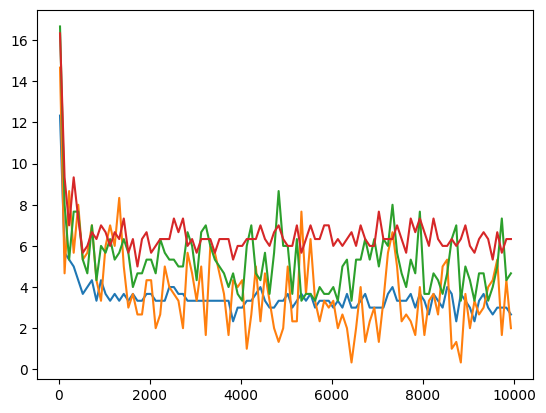

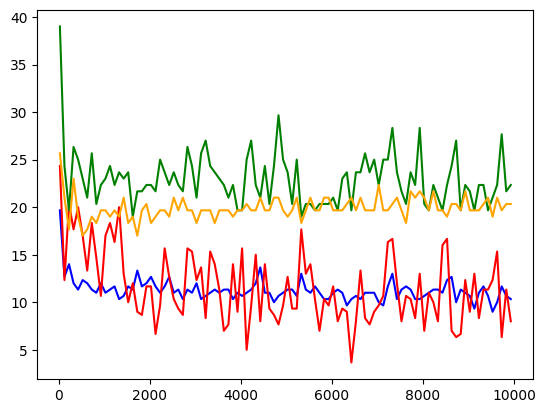

In [5]:
PC_results_aggregated_MEC = np.array(PC_results_aggregated_MEC)
GSP_results_aggregated_MEC = np.array(GSP_results_aggregated_MEC)
GES_results_aggregated_MEC  = np.array(GES_results_aggregated_MEC)
FCI_results_aggregated_MEC = np.array(FCI_results_aggregated_MEC)


PC_results_MEC_avg = np.average(PC_results_aggregated_MEC, axis=0)
GSP_results_MEC_avg = np.average(GSP_results_aggregated_MEC, axis=0)
GES_results_MEC_avg = np.average(GES_results_aggregated_MEC, axis=0)
FCI_results_aggregated_MEC_avg = np.average(FCI_results_aggregated_MEC, axis=0)

plt.plot(sample_nums, PC_results_MEC_avg)
plt.plot(sample_nums, GSP_results_MEC_avg)
plt.plot(sample_nums, GES_results_MEC_avg)
plt.plot(sample_nums, FCI_results_aggregated_MEC_avg)
plt.show()

PC_results_aggregated_skeleton = np.array(PC_results_aggregated_skeleton)
GSP_results_aggregated_skeleton = np.array(GSP_results_aggregated_skeleton)
GES_results_aggregated_skeleton  = np.array(GES_results_aggregated_skeleton)
FCI_results_aggregated_skeleton = np.array(FCI_results_aggregated_skeleton)

PC_results_skeleton_avg = np.average(PC_results_aggregated_skeleton, axis=0)
GSP_results_skeleton_avg = np.average(GSP_results_aggregated_skeleton, axis=0)
GES_results_skeleton_avg = np.average(GES_results_aggregated_skeleton, axis=0)
FCI_results_skeleton_avg = np.average(FCI_results_aggregated_skeleton, axis=0)

plt.plot(sample_nums, PC_results_skeleton_avg, label="PC", color="blue")
plt.plot(sample_nums, GSP_results_skeleton_avg, label="GSP", color="red")
plt.plot(sample_nums, GES_results_skeleton_avg, label="GES", color="green")
plt.plot(sample_nums, FCI_results_skeleton_avg, label="FCI", color="orange")
plt.show()